In [32]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [33]:
file = Path("../Resources/clean3data.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
0,652,2019,Albania,1852000000,2458000000,6406000,15401826080,2854191
1,218,2017,Albania,1473000000,2050000000,5118000,13019726211,2873457
2,869,2020,Albania,805000000,1243000000,2658000,15162734205,2837849
3,435,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
4,1,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101


In [34]:
drop = df.drop(["Unnamed: 0"],axis = 1)
drop.head()

,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
0,2019,Albania,1852000000,2458000000,6406000,15401826080,2854191
1,2017,Albania,1473000000,2050000000,5118000,13019726211,2873457
2,2020,Albania,805000000,1243000000,2658000,15162734205,2837849
3,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
4,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101


In [35]:
dfwork = drop[(drop["Year"]>= 2017) & (drop["Year"] <= 2017)]
dfwork.head()

,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
1,2017,Albania,1473000000,2050000000,5118000,13019726211,2873457
5,2017,Algeria,632000000,171000000,2451000,170096989042,41136546
11,2017,Angola,1216000000,884000000,261000,68972769395,30208628
19,2017,Antigua and Barbuda,106000000,820000000,1040000,1467955555,91119
23,2017,Argentina,14180000000,5830000000,6711000,643628396190,44044811


In [36]:
dfwork.count()

Year                                        151
Country Name                                151
International Tourism Expenditures (US$)    151
International Tourism Receipts (US$)        151
# of arrivals                               151
GDP (US$)                                   151
Total Population                            151
dtype: int64

In [37]:
def corfunction(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regressval = x * slope + intercept 
    plt.scatter(x,y,marker ="o",facecolors = "blue",edgecolors = "black")
    plt.plot(x,regressval,"r-")
    plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
    plt.grid
    labelx = abelx
    xlabel = labelx
    labely = abely
    ylabel = labely
    title1 = title2
    title = title1
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show
    return 

In [38]:
### Question 1 ### 
# Which countries attract the most tourists?

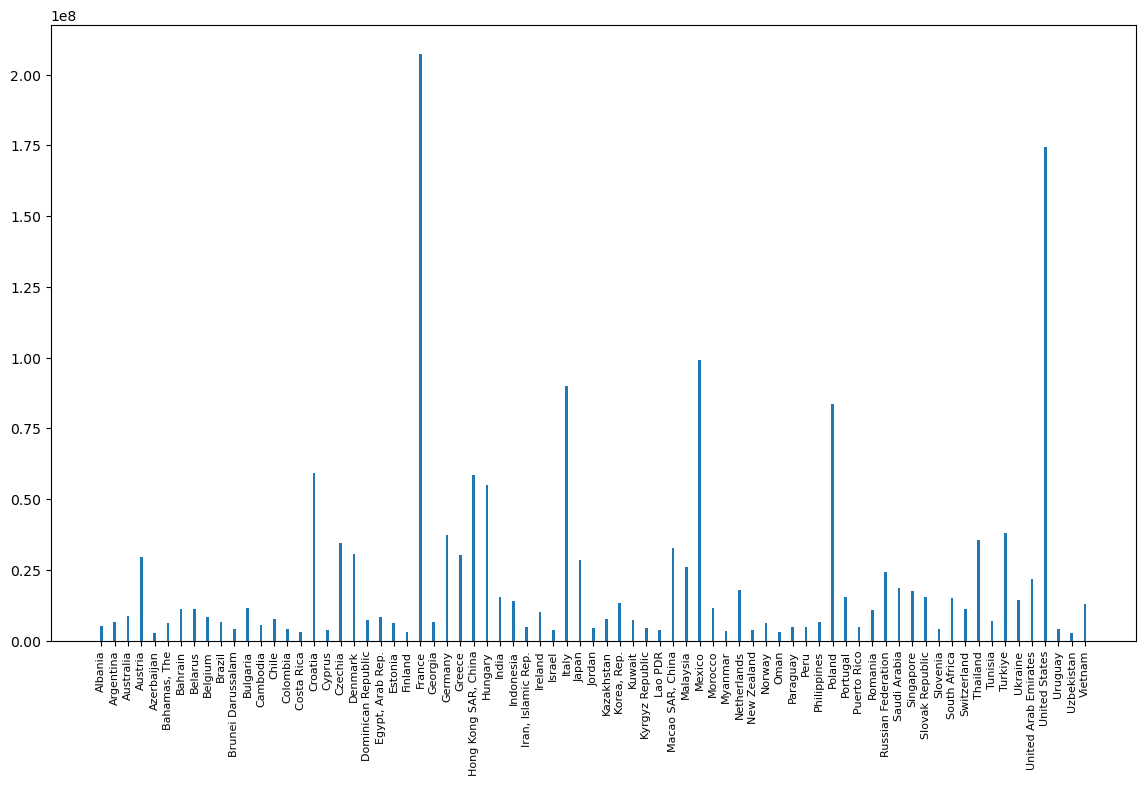

In [39]:
plt.figure(figsize=(14, 8))
arrivals = dfwork["# of arrivals"].astype(int)
threshold = arrivals.median()
filtered_df = dfwork[arrivals > threshold]
x_axis = np.arange(len(filtered_df))
labels = filtered_df["Country Name"]
bar_width = 0.2
plt.bar(x_axis, filtered_df["# of arrivals"], width=bar_width)
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.savefig("../png/2017bar1.png")
plt.show()

In [40]:
top10 = dfwork["# of arrivals"].median()
upper = dfwork[dfwork["# of arrivals"] > top10]
topdf = upper.sort_values(by="# of arrivals", ascending=False).head(10)
result10 = topdf[['Country Name', '# of arrivals']]
result10

,Country Name,# of arrivals
227,France,207274000
632,United States,174291750
380,Mexico,99349000
298,Italy,89931000
477,Poland,83804000
159,Croatia,59238000
270,"Hong Kong SAR, China",58472000
275,Hungary,54962000
616,Turkiye,37970000
239,Germany,37452000


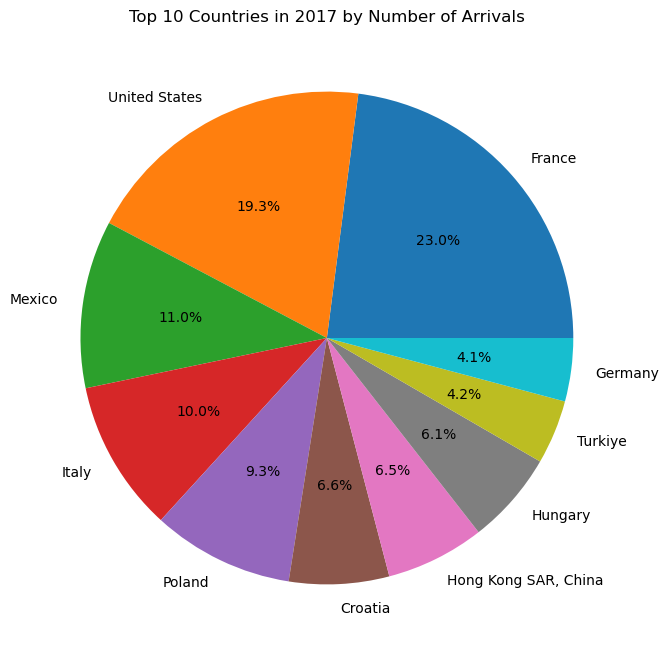

<Figure size 640x480 with 0 Axes>

In [41]:
count = result10['# of arrivals']
labels = result10['Country Name']
plt.figure(figsize=(8, 8))
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Countries in 2017 by Number of Arrivals')
plt.show()
plt.savefig("../png/2017pie1.png")

In [42]:
us_tourismper = dfwork.loc[dfwork["Country Name"] == "United States", "International Tourism Receipts (US$)"]
us_gdp = dfwork.loc[dfwork["Country Name"]== "United States","GDP (US$)"]
ustourismper = (us_tourismper * us_gdp) / 100
ustourismper


632   -5.241764e+16
dtype: float64

In [43]:
### Question 2 ###  
# Which countries have the highest receipts from tourism?

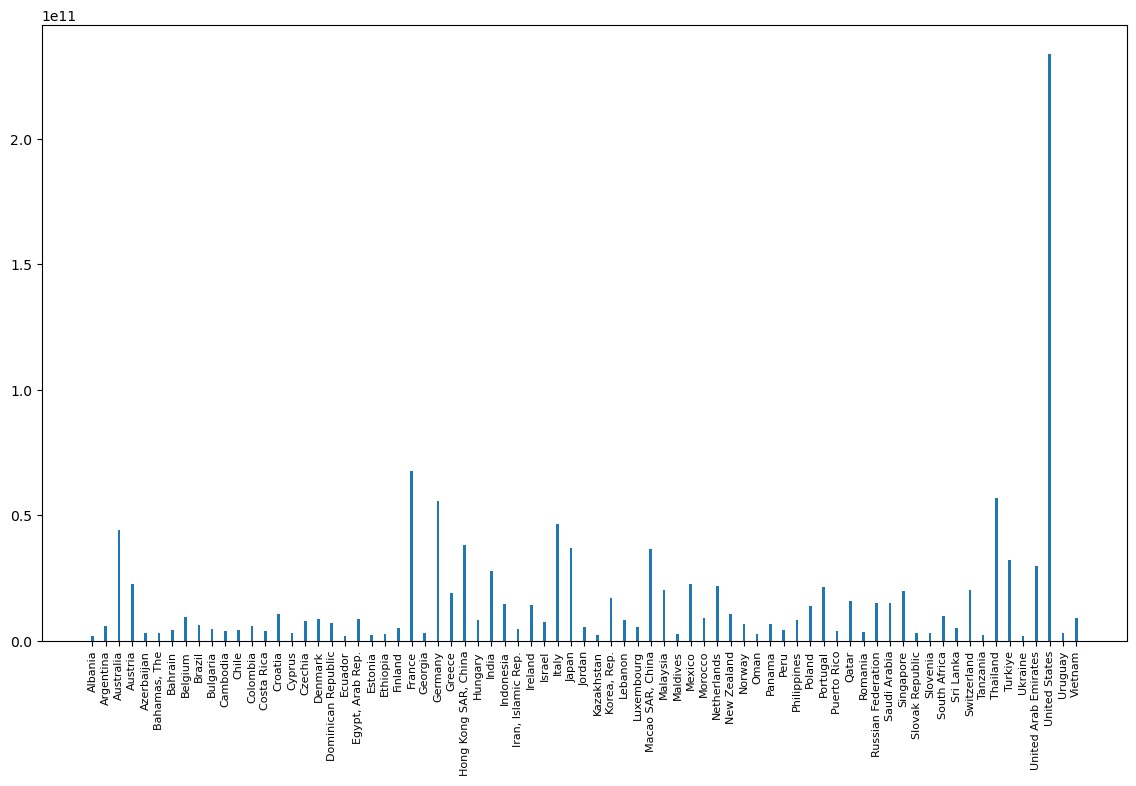

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(14, 8))
reciepts = dfwork["International Tourism Receipts (US$)"].astype(int)
threshold = reciepts.median()
filtered_df = dfwork[reciepts > threshold]
x_axis = np.arange(len(filtered_df))
labels = filtered_df["Country Name"]
bar_width = 0.2
plt.bar(x_axis, filtered_df["International Tourism Receipts (US$)"], width=bar_width)
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.show()
plt.savefig("../png/2017bar2.png")

In [45]:
top10reciepts = dfwork["International Tourism Receipts (US$)"].median()
upperreciepts = dfwork[dfwork["International Tourism Receipts (US$)"] > top10reciepts]
toprecieptsdf = upperreciepts.sort_values(by="International Tourism Receipts (US$)", ascending=False).head(10)
recieptsresult10 = toprecieptsdf[["Country Name", "International Tourism Receipts (US$)"]]
recieptsresult10

,Country Name,International Tourism Receipts (US$)
632,United States,233758000000
227,France,67717000000
589,Thailand,57057000000
239,Germany,55750000000
298,Italy,46719000000
34,Australia,43975000000
270,"Hong Kong SAR, China",38170000000
305,Japan,36978000000
345,"Macao SAR, China",36595000000
616,Turkiye,31993000000


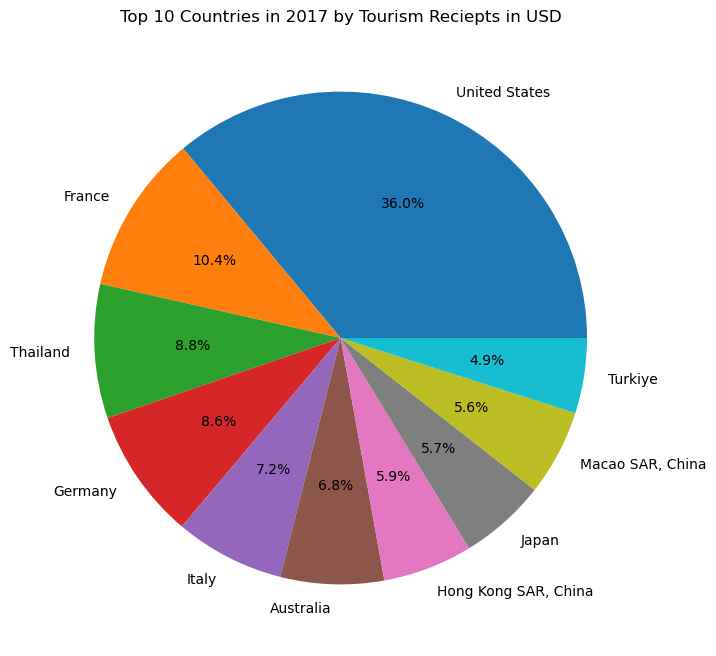

<Figure size 640x480 with 0 Axes>

In [46]:
count2 = recieptsresult10["International Tourism Receipts (US$)"]
labels2 = recieptsresult10['Country Name']
plt.figure(figsize=(8, 8))
plt.pie(count2, labels=labels2, autopct='%1.1f%%')
plt.title('Top 10 Countries in 2017 by Tourism Reciepts in USD')
plt.show()
plt.savefig("../png/2017pie2.png")

In [47]:
### Question 3 ###
# Which countries have the highest GDP?

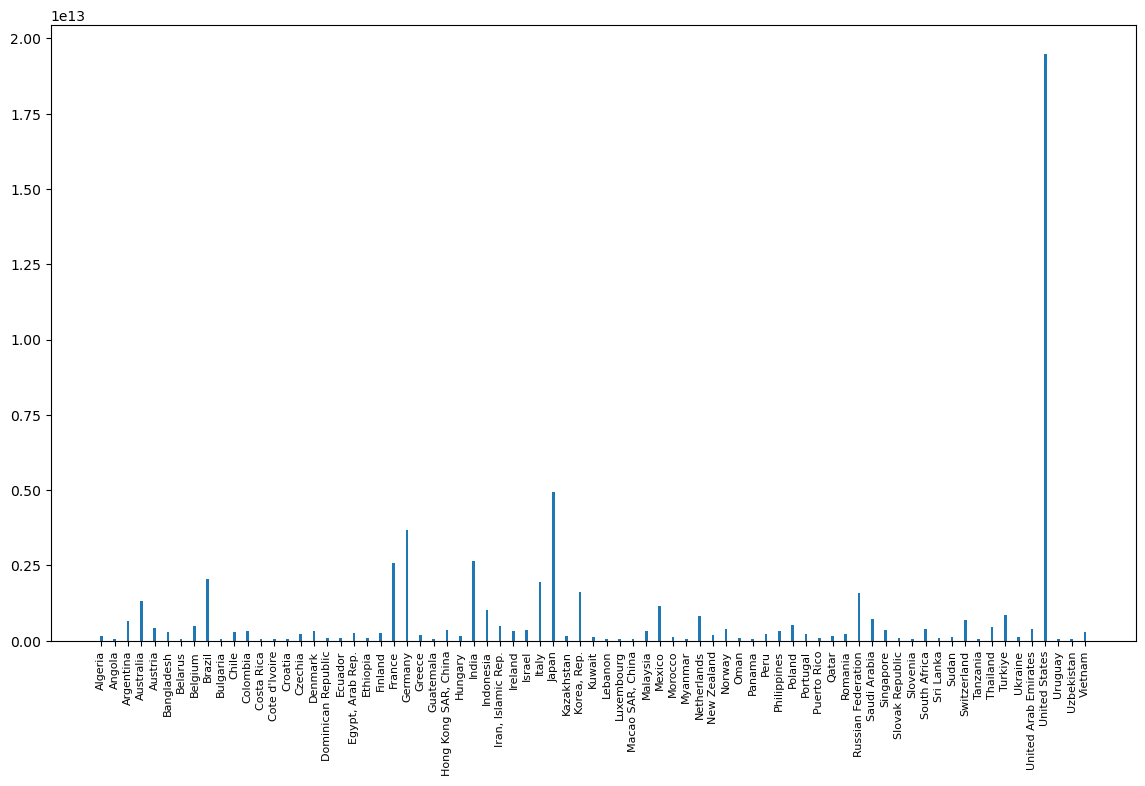

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(14, 8))
gdp = dfwork["GDP (US$)"].astype(int)
threshold = gdp.median()
filtered_df = dfwork[gdp > threshold]
x_axis = np.arange(len(filtered_df))
labels = filtered_df["Country Name"]
bar_width = 0.2
plt.bar(x_axis, filtered_df["GDP (US$)"], width=bar_width)
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.show()
plt.savefig("../png/2017bar3.png")

In [49]:
top10gdp = dfwork["GDP (US$)"].median()
uppergdp = dfwork[dfwork["GDP (US$)"] > top10gdp]
top_gdp_df = uppergdp.sort_values(by="International Tourism Receipts (US$)", ascending=False).head(10)
gdp_result10 = top_gdp_df[["Country Name", "GDP (US$)"]]
gdp_result10

,Country Name,GDP (US$)
632,United States,19477336549000
227,France,2595151045197
589,Thailand,456356812774
239,Germany,3690849152517
298,Italy,1961796197354
34,Australia,1326467487376
270,"Hong Kong SAR, China",341273289534
305,Japan,4930837369151
345,"Macao SAR, China",50440935654
616,Turkiye,858988578709


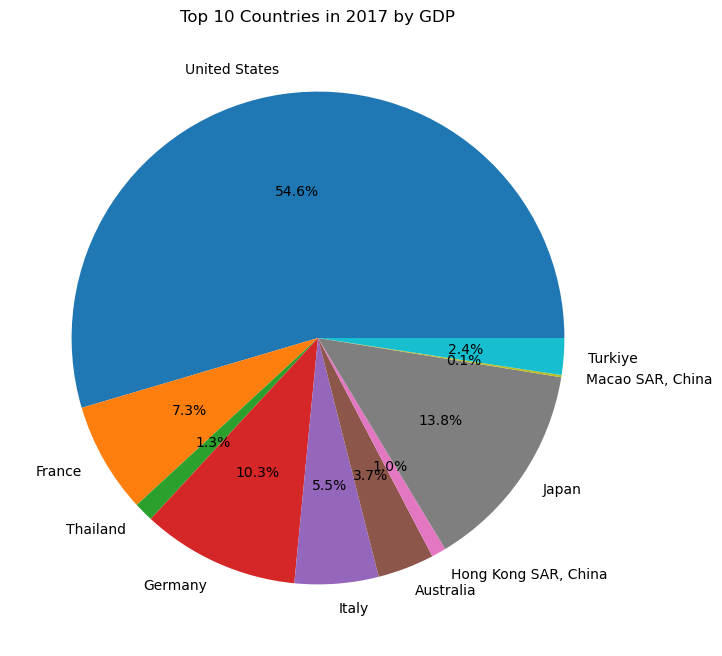

<Figure size 640x480 with 0 Axes>

In [50]:
count3 = gdp_result10["GDP (US$)"]
labels3 = gdp_result10['Country Name']
plt.figure(figsize=(8, 8))
plt.pie(count3, labels=labels3, autopct='%1.1f%%')
plt.title('Top 10 Countries in 2017 by GDP')
plt.show()
plt.savefig("../png/2017pie3.png")

In [51]:
### Question 4 ###
# What is the correlation?

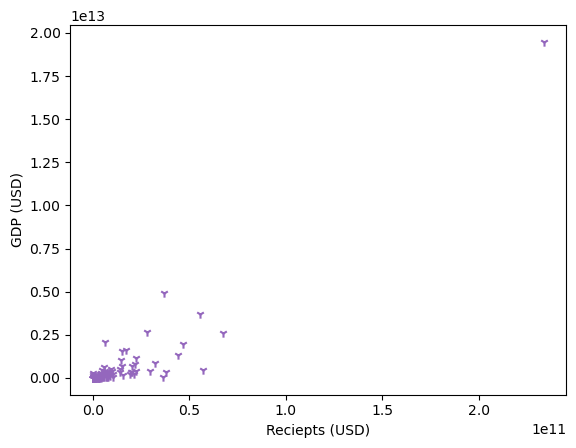

<Figure size 640x480 with 0 Axes>

In [52]:
xaxis = dfwork.groupby("Country Name")["International Tourism Receipts (US$)"].mean()
yaxis = dfwork.groupby("Country Name")["GDP (US$)"].mean()

plt.scatter(xaxis, yaxis, marker="1", facecolors="tab:purple")
plt.xlabel("Reciepts (USD)")
plt.ylabel("GDP (USD)")
plt.show()
plt.savefig("../png/2017scatter1.png")

In [53]:
## Removing outlier
df_filtered = dfwork[dfwork["Country Name"] != "United States"]

The r-value is: 0.7041818863015813


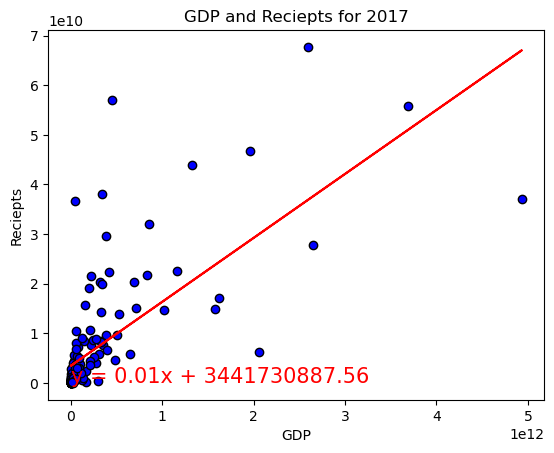

In [54]:
x = df_filtered["GDP (US$)"]
y = df_filtered["International Tourism Receipts (US$)"]
abelx = "GDP"
abely = "Reciepts"
title2 = "GDP and Reciepts for 2017"
corfunction(x,y)
plt.savefig("../png/2017scatter2.png")

In [55]:
### After removing the US as the outlier there appears to be a 70% probability that there is a correlation between
### tourism reciepts and the GDP of a country.

The r-value is: 0.7214785865396717


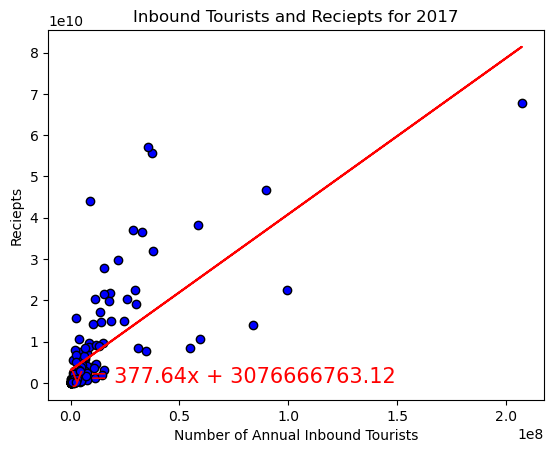

In [56]:
x = df_filtered["# of arrivals"]
y = df_filtered["International Tourism Receipts (US$)"]
abelx = "Number of Annual Inbound Tourists"
abely = "Reciepts"
title2 = "Inbound Tourists and Reciepts for 2017"
corfunction(x,y)
plt.savefig("../png/2017scatter3.png")

The r-value is: 0.4939534788070123


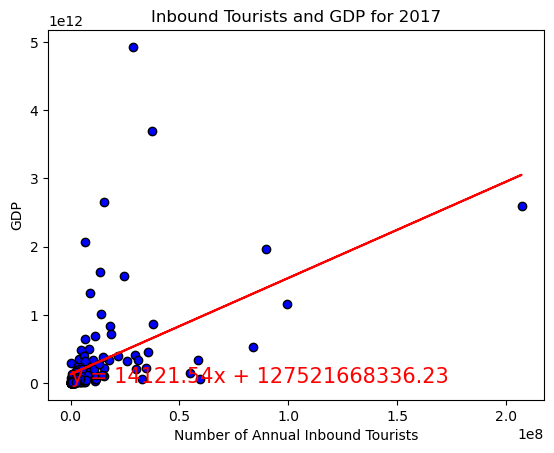

In [57]:
x = df_filtered["# of arrivals"]
y = df_filtered["GDP (US$)"]
abelx = "Number of Annual Inbound Tourists"
abely = "GDP"
title2 = "Inbound Tourists and GDP for 2017"
corfunction(x,y)
plt.savefig("../png/2017scatter4.png")